# Theory

## Mathematical definition

Given the following parameters
- $N \in \mathbb{N} \dots$ size parameter (number of components)
- $\lambda \in \mathbb{R}_+ \dots$ rate paremeter (exponential distribution of delays)
- $\alpha \in \left[0, \tfrac{1}{2}\right]\dots$ window size parameter (activity window of response function)
- $K \in [0, 1] \dots$ coupling constant (interaction probability of components)

we construct a network on $N$ vertices as follows:
1. Each vertex $i$ is associated with a _position_ $\theta_i \sim \operatorname{WrapExp}(\lambda)$ drawn from a wrapped exponential distribution with rate parameter $\lambda$.
2. Now the edge probability for the two vertices $i$ and $j$ is given by the "positive part" of a linear function of the distance of $\theta_i$ and $\theta_j$, i.e.

$$p_{ij} 
= K \cdot \left| 1- \frac{d\left(\theta_i, \theta_j\right)}{2\pi\alpha} \right|_+ \, ,$$

where $d$ is the "circular distance" of two points, i.e. $d(x,y) = \min \big\{{|x-y|, 2\pi-|x-y|} \big\}$ and $|x|_+$ is the positive part, i.e. $|x|_+ = x$ for $x \geq 0$ and $|x|_+ = 0$ otherwise.

In [1]:
import numpy as np
import ringity as rng
import matplotlib.pyplot as plt

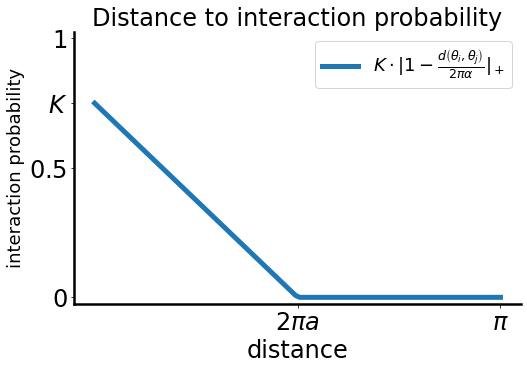

In [22]:
K = 0.75
a = 0.25

x = np.linspace(0, np.pi, 100)
y = K*(1-x/(2*np.pi*a)).clip(0)

fig, ax = plt.subplots(figsize = (8,5))

ax.set_title("Distance to interaction probability", fontsize = 24)
ax.plot(x, y, linewidth = 5, label = r"$K \cdot \left| 1- \frac{d\left(\theta_i, \theta_j\right)}{2\pi\alpha} \right|_+$")


plt.xticks([2*np.pi*a, np.pi], [r'$2\pi a$', r'$\pi$'])
plt.yticks([0, 0.5, 1, K], [r'$0$', r'$0.5$', r'$1$', r'$K$'])

ax.set_ylim(-0.025, 1.025)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel('distance', fontsize=24)
ax.set_ylabel('interaction probability', fontsize=18)

rng.ax_setup(ax)

ax.legend(fontsize = 18);

**Note:** The positions $\theta_i$ completely determine the probability matrix $P = (p_{ij})$ which (for $\lambda < \infty$) describes an _inhomogenious_ random graph model.

## Motivation behind the definitions

In [3]:
def response(x, theta, alpha = 0.5):
    window_size = 2*np.pi*alpha
    return np.where(abs((x-theta) % (2*np.pi)) < window_size, 1, 0)

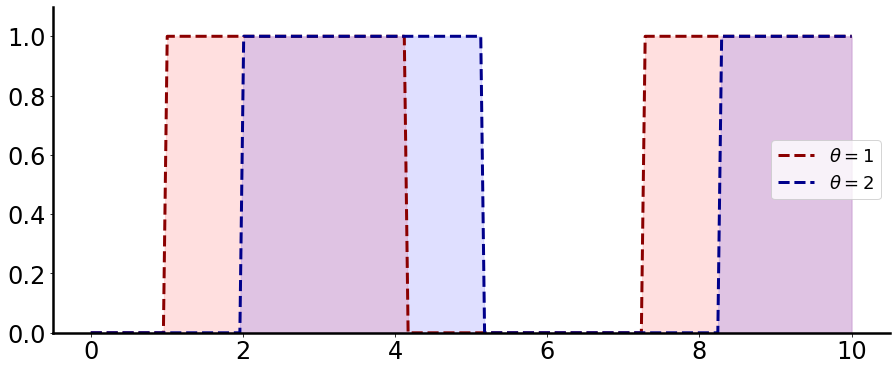

In [4]:
alpha = 0.5
theta1 = 1
theta2 = 2
x = np.linspace(0, 10, 200)

fig, ax = plt.subplots(figsize=(15,6))
ax.set_ylim(0, 1.1)

ax.plot(x, response(x, theta=theta1, alpha=alpha), '--', c = 'darkred', linewidth=3, label = rf'$\theta = {theta1}$');
ax.plot(x, response(x, theta=theta2, alpha=alpha), '--', c = 'darkblue', linewidth=3, label = rf'$\theta = {theta2}$');

ax.fill_between(x, response(x, theta=theta1, alpha=alpha), color = 'red', alpha = 0.125)
ax.fill_between(x, response(x, theta=theta2, alpha=alpha), color = 'blue', alpha = 0.125)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
rng.ax_setup(ax)
ax.legend(loc = 'center right', prop={'size': 18});

Assuming the response functions are elements of $r_i, r_j \in L^2([0, 2\pi])$ we can calculate the "cosine similarity" as
$$s_{i,j} = \frac{\langle r_i, r_j \rangle}{\|r_i \| \|r_j \|} = \left| 1 - \frac{d(\theta_i, \theta_j)}{2\pi \alpha} \right|_{+} \, ,$$
where $| x |_+$ is the _positive part_ of $x$, i.e. $|x|_+ = x$ for $x \geq 0$ and $|x|_+ = 0$ otherwise.

Since $s_{ij} \in [0,1]$ we can take $S = (s_{ij})$ already to define the random network. However, these networks tend to be densly connected and hence we introduce an additional parameter $K \in [0,1]$ to have more control over the overall connectivity by linearly scaling the similarities $P = K\cdot S$. The coupling constant $K$ is corresponds to the probability with which two components are interacting when they have exactly the same response function.

## Alternative parametrization

### Delay as normalized distribution parameter

[WRONG DIRECTION]
We will introduce a _delay parameter_ $\beta$ to parametrize the exponential distribution with a bounded parameter $\beta \in [0,1]$ such that $\beta = 0$ results in the delta distribution at the origin ($\lambda \rightarrow 0$), wheras $\beta = 1$ results in the uniform distribution $\lambda \rightarrow \infty$. To that end define the transformations
- $\beta = 1 - \frac{2}{\pi} \arctan(\lambda)$.
- $\lambda = \tan \left(\frac{\pi}{2}(1-\beta) \right)$

The parameter $\beta$ has the interpretation of a _response parameter_ of the internal states to an external signal. $\beta = 0$ means an immediate response of all internal states to the signal, whereas $\beta = 1$ results in no influence of internal states to the external stimulus. 

**Note 1:** For $\beta = 0$ the model "looses its stochasticity" on the node level, forcing each node to behave the same. This system is _homogeneous_ and we recover the _Erdös-Renyi model_.

**Note 2:** For $\beta = 1$ the components are uniformly sampled on the circle and we obtain a _generalized geometric random graph_ with connection function specified by $p$. However, for $K \rightarrow \infty$ we recover the "classical" geometric random graph on the circle with a "hard cutoff" at $2\pi \alpha$.

### Network density as normalized coupling strength

$$\rho = K \cdot \frac{ 2\sinh(2A + B)\sinh(A) \sinh(A+B)}
{A\big(\cosh(2A+2B)-1\big)} \,$$
for $K \leq 1$ and $A = a\pi\lambda$ and $B = \pi\lambda - 2A$.

For $a = \frac{1}{2}$ this reduces to
$$\rho = K \cdot \left(1 -  \frac{\tanh (\pi\lambda / 2)}{\pi \lambda} \right) \, .$$

For $a = \frac{1}{4}$ this reduces to
$$\rho = K \cdot [\text{MISSING}] \, .$$

For $\beta = 1$ this reduces to
$$\rho = aK \, .$$

For $\beta = 0$ this reduces to
$$\rho = K \, .$$

# Spielwiese

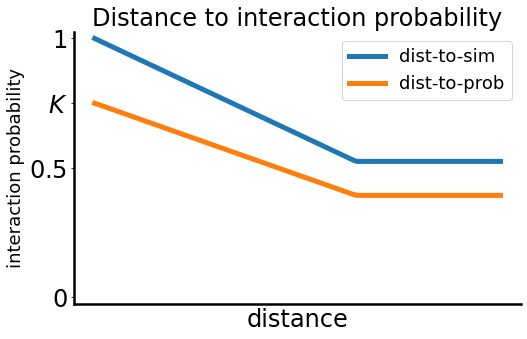

In [46]:
K = 0.75
a = 0.678

x = np.linspace(0, np.pi, 100)
y1 = rng.classes.network_model.box_cosine_similarity(x, box_length=2*a*np.pi)
y2 = rng.classes.network_model.linear_probability(y1, slope=K, intercept=0)

fig, ax = plt.subplots(figsize = (8,5))

ax.set_title("Distance to interaction probability", fontsize = 24)
ax.plot(x, y1, linewidth = 5, label = "dist-to-sim")
ax.plot(x, y2, linewidth = 5, label = "dist-to-prob")


plt.xticks([2*np.pi*a], [r'$2\pi a$'])
plt.yticks([0, 0.5, 1, K], [r'$0$', r'$0.5$', r'$1$', r'$K$'])

ax.set_ylim(-0.025, 1.025)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel('distance', fontsize=24)
ax.set_ylabel('interaction probability', fontsize=18)

rng.ax_setup(ax)

ax.legend(fontsize = 18);

In [44]:
y1

array([1.        , 0.99255088, 0.98510176, 0.97765263, 0.97020351,
       0.96275439, 0.95530527, 0.94785614, 0.94040702, 0.9329579 ,
       0.92550878, 0.91805965, 0.91061053, 0.90316141, 0.89571229,
       0.88826316, 0.88081404, 0.87336492, 0.8659158 , 0.85846667,
       0.85101755, 0.84356843, 0.83611931, 0.82867018, 0.82122106,
       0.81377194, 0.80632282, 0.79887369, 0.79142457, 0.78397545,
       0.77652633, 0.7690772 , 0.76162808, 0.75417896, 0.74672984,
       0.73928071, 0.73183159, 0.72438247, 0.71693335, 0.70948422,
       0.7020351 , 0.69458598, 0.68713686, 0.67968773, 0.67223861,
       0.66478949, 0.65734037, 0.64989124, 0.64244212, 0.634993  ,
       0.62754388, 0.62009475, 0.61264563, 0.60519651, 0.59774739,
       0.59029826, 0.58284914, 0.57540002, 0.5679509 , 0.56050177,
       0.55305265, 0.54560353, 0.53815441, 0.53070528, 0.52507375,
       0.52507375, 0.52507375, 0.52507375, 0.52507375, 0.52507375,
       0.52507375, 0.52507375, 0.52507375, 0.52507375, 0.52507

In [48]:
2*np.pi*(2*a-1) / (2*a*np.pi)

0.5250737463126844

# Figure 3B-F - remastered

In [5]:
import networkx as nx

## Default model (with $K=1$, $a=0.25$, $\beta=1$)

In [6]:
N = 2**10
a = 0.25
beta = 0.99
K = 1

rate  = np.tan(np.pi * (1-beta) / 2)

G, pos = rng.network_model(N=N, a=a, K=K, beta=beta, return_positions=True)


rho = nx.density(G)
score = rng.diagram(G).ring_score

In [7]:
circ_layout = {n:(np.cos(t), np.sin(t)) for n,t in enumerate(pos)}
spring_layout = nx.spring_layout(G)

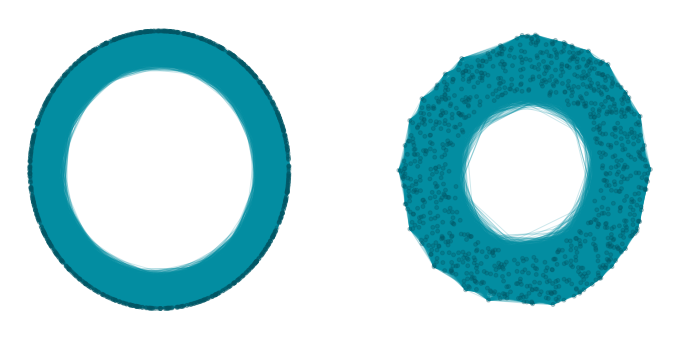

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,6))

ax1.set_xlim(-1.175,1.175)
ax1.set_ylim(-1.175,1.175)

rng.plot_nx(G, ax=ax1, pos = circ_layout)
rng.plot_nx(G, ax=ax2, pos = spring_layout)

In [9]:
print(f"density: {rng.interaction_strength_to_density(K=K, a=a, rate=rate):.3f}")
print(f"density: {rho:.3f}")
print(f"score:   {score:.3f}")

density: 0.250
density: 0.250
score:   0.993


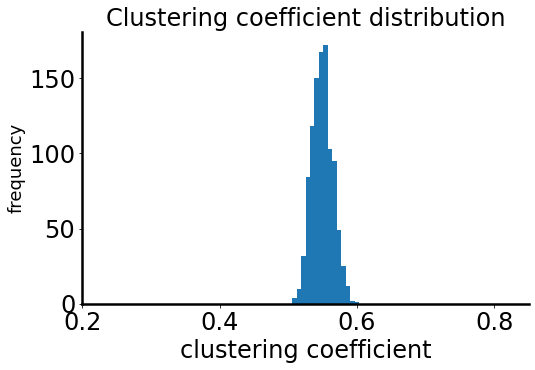

In [10]:
fig, ax = plt.subplots(figsize = (8,5))

ax.set_title("Clustering coefficient distribution", fontsize = 24)
ax.hist(rng.clustering_coefficient(G), bins=100, range = (0.2, 0.85));

ax.set_xlim(0.2, 0.85)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel('clustering coefficient', fontsize=24)
ax.set_ylabel('frequency', fontsize=18)

rng.ax_setup(ax)

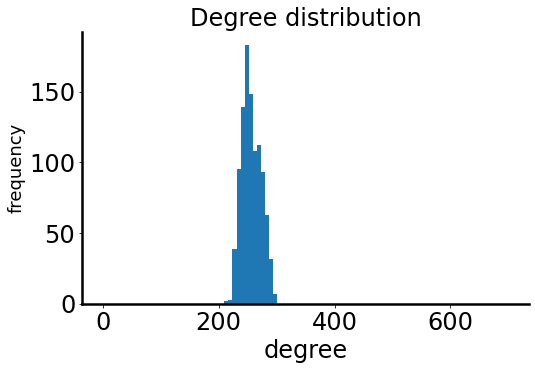

In [11]:
degs = [deg for n, deg in nx.degree(G)]

fig, ax = plt.subplots(figsize = (8,5))

ax.set_title("Degree distribution", fontsize = 24)

ax.hist(degs, bins=100, range = (0,700));

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel('degree', fontsize=24)
ax.set_ylabel('frequency', fontsize=18)

rng.ax_setup(ax)

## Weaker interaction strength $K$ ($a=0.25$, $\beta=1$)

In [12]:
N = 2**10
a = 0.25
beta = 0.99
K = 0.5

rate  = np.tan(np.pi * (1-beta) / 2)

G, pos = rng.network_model(N=N, a=a, K=K, beta=beta, return_positions=True)

rho = nx.density(G)
score = rng.diagram(G).ring_score

In [13]:
circ_layout = {n:(np.cos(t), np.sin(t)) for n,t in enumerate(pos)}
spring_layout = nx.spring_layout(G)

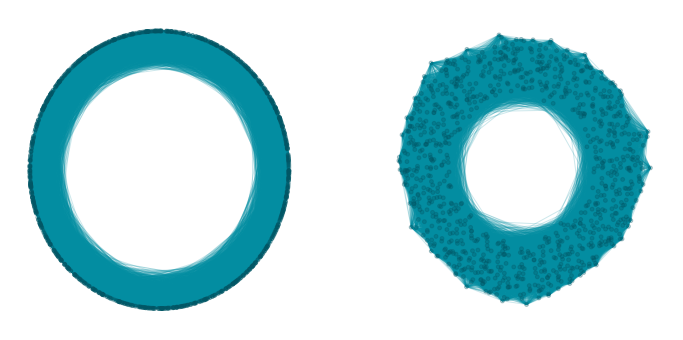

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,6))

ax1.set_xlim(-1.175,1.175)
ax1.set_ylim(-1.175,1.175)

rng.plot_nx(G, ax=ax1, pos = circ_layout)
rng.plot_nx(G, ax=ax2, pos = spring_layout)

In [15]:
print(f"density: {rng.interaction_strength_to_density(K=K, a=a, rate=rate):.3f}")
print(f"density: {rho:.3f}")
print(f"score:   {score:.3f}")

density: 0.125
density: 0.125
score:   0.966


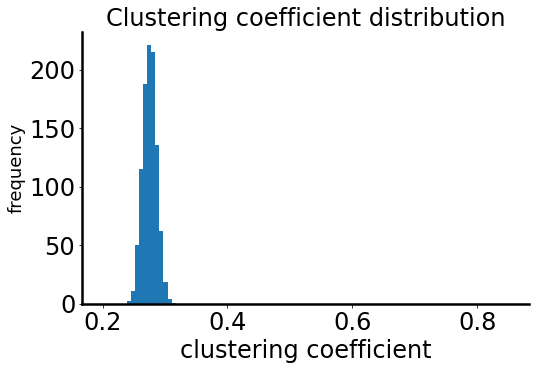

In [16]:
fig, ax = plt.subplots(figsize = (8,5))

ax.set_title("Clustering coefficient distribution", fontsize = 24)
ax.hist(rng.clustering_coefficient(G), bins=100, range = (0.2, 0.85));

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel('clustering coefficient', fontsize=24)
ax.set_ylabel('frequency', fontsize=18)

rng.ax_setup(ax)

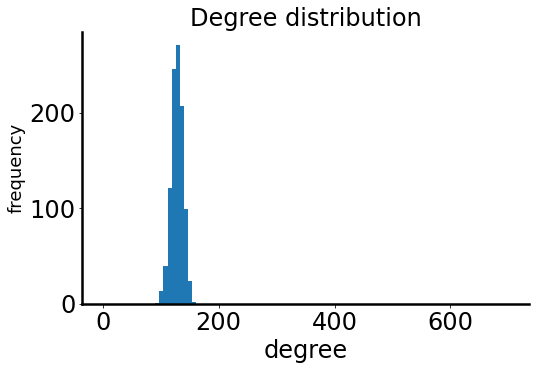

In [17]:
degs = [deg for n, deg in nx.degree(G)]

fig, ax = plt.subplots(figsize = (8,5))

ax.set_title("Degree distribution", fontsize = 24)
ax.hist(degs, bins=100, range = (0,700));

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel('degree', fontsize=24)
ax.set_ylabel('frequency', fontsize=18)

rng.ax_setup(ax)

## Shorter response length $a$ (with $K=1$, $\beta=1$)

In [18]:
N = 2**10
a = 0.125
beta = 0.99
K = 1

rate  = np.tan(np.pi * (1-beta) / 2)

G, pos = rng.network_model(N=N, a=a, K=K, beta=beta, return_positions=True)

rho = nx.density(G)
score = rng.diagram(G).ring_score

In [19]:
circ_layout = {n:(np.cos(t), np.sin(t)) for n,t in enumerate(pos)}
spring_layout = nx.spring_layout(G)

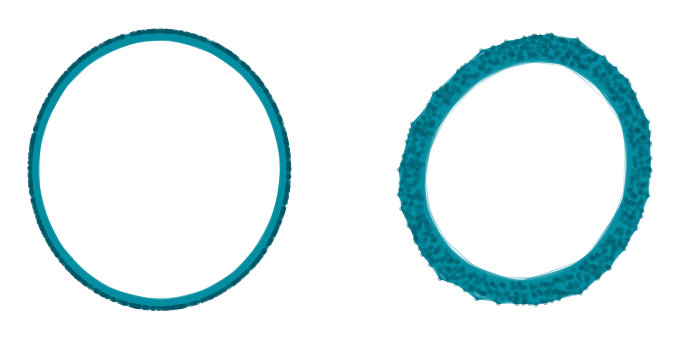

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,6))

ax1.set_xlim(-1.175,1.175)
ax1.set_ylim(-1.175,1.175)

rng.plot_nx(G, ax=ax1, pos = circ_layout)
rng.plot_nx(G, ax=ax2, pos = spring_layout)

In [21]:
print(f"density: {rng.interaction_strength_to_density(K=K, a=a, rate=rate):.3f}")
print(f"density: {rho:.3f}")
print(f"score:   {score:.3f}")

density: 0.125
density: 0.125
score:   0.995


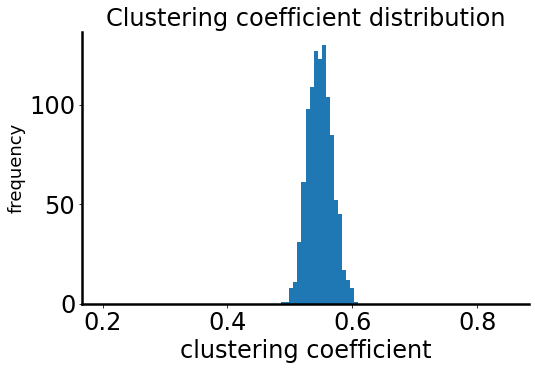

In [22]:
fig, ax = plt.subplots(figsize = (8,5))

ax.set_title("Clustering coefficient distribution", fontsize = 24)

ax.hist(rng.clustering_coefficient(G), bins=100, range = (0.2, 0.85));

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel('clustering coefficient', fontsize=24)
ax.set_ylabel('frequency', fontsize=18)

rng.ax_setup(ax)

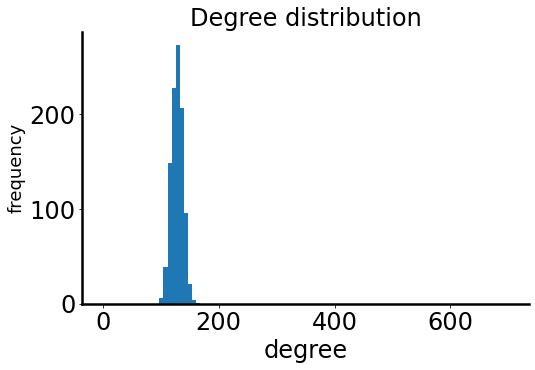

In [23]:
degs = [deg for n, deg in nx.degree(G)]

fig, ax = plt.subplots(figsize = (8,5))

ax.set_title("Degree distribution", fontsize = 24)

ax.hist(degs, bins=100, range=(0, 700));

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel('degree', fontsize=24)
ax.set_ylabel('frequency', fontsize=18)

rng.ax_setup(ax)

## Longer response length $a$ (with $K=1$, $\beta=1$)

In [24]:
N = 2**10
a = 0.375
beta = 0.99
K = 1

rate  = np.tan(np.pi * (1-beta) / 2)

G, pos = rng.network_model(N=N, a=a, K=K, beta=beta, return_positions=True)

rho = nx.density(G)
score = rng.diagram(G).ring_score

In [25]:
circ_layout = {n:(np.cos(t), np.sin(t)) for n,t in enumerate(pos)}
spring_layout = nx.spring_layout(G)

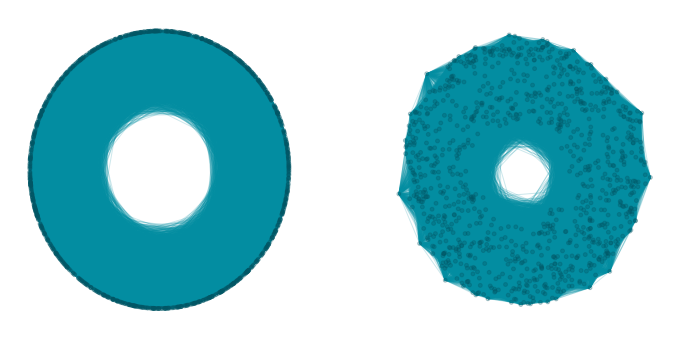

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,6))

ax1.set_xlim(-1.175,1.175)
ax1.set_ylim(-1.175,1.175)

rng.plot_nx(G, ax=ax1, pos = circ_layout)
rng.plot_nx(G, ax=ax2, pos = spring_layout)

In [27]:
print(f"density: {rng.interaction_strength_to_density(K=K, a=a, rate=rate):.3f}")
print(f"density: {rho:.3f}")
print(f"score:   {score:.3f}")

density: 0.375
density: 0.375
score:   0.983


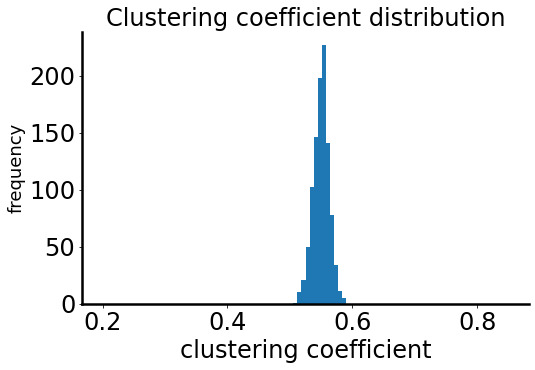

In [28]:
fig, ax = plt.subplots(figsize = (8,5))

ax.set_title("Clustering coefficient distribution", fontsize = 24)

ax.hist(rng.clustering_coefficient(G), bins=100, range = (0.2, 0.85));

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel('clustering coefficient', fontsize=24)
ax.set_ylabel('frequency', fontsize=18)

rng.ax_setup(ax)

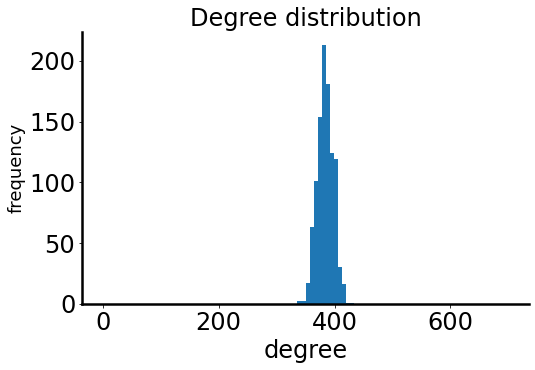

In [29]:
degs = [deg for n, deg in nx.degree(G)]

fig, ax = plt.subplots(figsize = (8,5))

ax.set_title("Degree distribution", fontsize = 24)
ax.hist(degs, bins=100, range=(0,700));


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel('degree', fontsize=24)
ax.set_ylabel('frequency', fontsize=18)

rng.ax_setup(ax)

## Shorter delay $\beta$ (with $K=1$, $a=0.25$)

In [30]:
N = 2**10
a = 0.25
beta = 0.5
K = 1

rate  = np.tan(np.pi * (1-beta) / 2)

G, pos = rng.network_model(N=N, a=a, K=K, beta=beta, return_positions=True)

rho = nx.density(G)
score = rng.diagram(G).ring_score

In [31]:
circ_layout = {n:(np.cos(t), np.sin(t)) for n,t in enumerate(pos)}
spring_layout = nx.spring_layout(G)

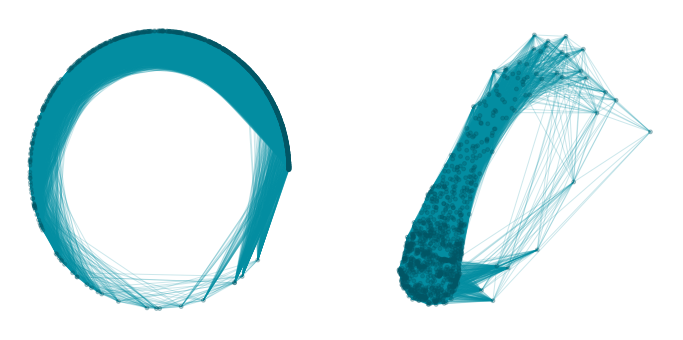

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,6))

ax1.set_xlim(-1.175,1.175)
ax1.set_ylim(-1.175,1.175)

rng.plot_nx(G, ax=ax1, pos = circ_layout)
rng.plot_nx(G, ax=ax2, pos = spring_layout)

In [33]:
print(f"density: {rng.interaction_strength_to_density(K=K, a=a, rate=rate):.3f}")
print(f"density: {rho:.3f}")
print(f"score:   {score:.3f}")

density: 0.499
density: 0.496
score:   0.466


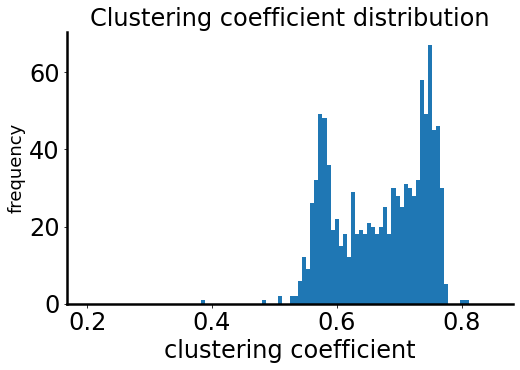

In [34]:
fig, ax = plt.subplots(figsize = (8,5))

ax.set_title("Clustering coefficient distribution", fontsize = 24)

ax.hist(rng.clustering_coefficient(G), bins=100, range = (0.2, 0.85));

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel('clustering coefficient', fontsize=24)
ax.set_ylabel('frequency', fontsize=18)

rng.ax_setup(ax)

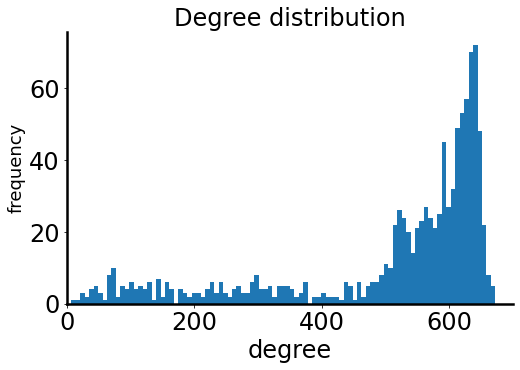

In [35]:
degs = [deg for n, deg in nx.degree(G)]

fig, ax = plt.subplots(figsize = (8,5))

ax.set_title("Degree distribution", fontsize = 24)

ax.hist(degs, bins=100, range=(0,700));

ax.set_xlim(0, 700)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel('degree', fontsize=24)
ax.set_ylabel('frequency', fontsize=18)

rng.ax_setup(ax)

# Spielwiese

In [67]:
N = 2**10
a = 0.375
beta = 0.75
K = 1

rate  = np.tan(np.pi * (1-beta) / 2)

G, pos = rng.network_model(N=N, a=a, K=K, beta=beta, return_positions=True)

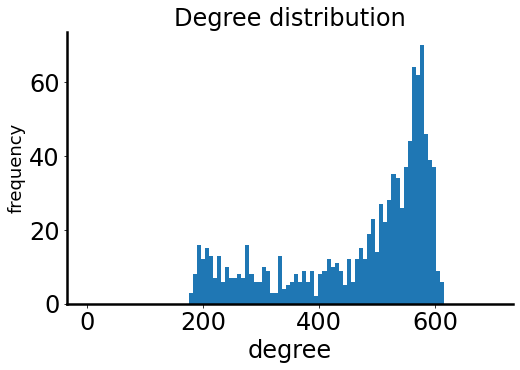

In [68]:
degs = [deg for n, deg in nx.degree(G)]

fig, ax = plt.subplots(figsize = (8,5))

ax.set_title("Degree distribution", fontsize = 24)

ax.hist(degs, bins=100, range=(0,700));

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel('degree', fontsize=24)
ax.set_ylabel('frequency', fontsize=18)

rng.ax_setup(ax)

In [76]:
N = 2**10
a = 1
beta = 0.999
K = 0.05

rate  = np.tan(np.pi * (1-beta) / 2)

G, pos = rng.network_model(N=N, a=a, K=K, beta=beta, return_positions=True)

circ_layout = {n:(np.cos(t), np.sin(t)) for n,t in enumerate(pos)}
spring_layout = nx.spring_layout(G)

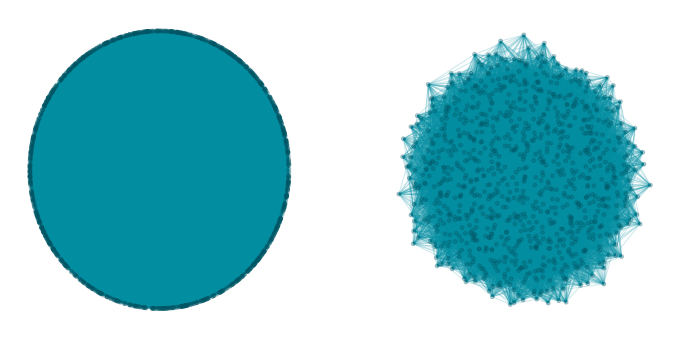

In [77]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,6))

ax1.set_xlim(-1.175,1.175)
ax1.set_ylim(-1.175,1.175)

rng.plot_nx(G, ax=ax1, pos = circ_layout)
rng.plot_nx(G, ax=ax2, pos = spring_layout)

In [78]:
print(f"density: {rng.interaction_strength_to_density(K=K, a=a, rate=rate):.3f}")
print(f"density: {rho:.3f}")
print(f"score:   {score:.3f}")

density: 0.050
density: 0.496
score:   0.466


# Density vs interaction strength

In [54]:
from itertools import product
from collections import defaultdict

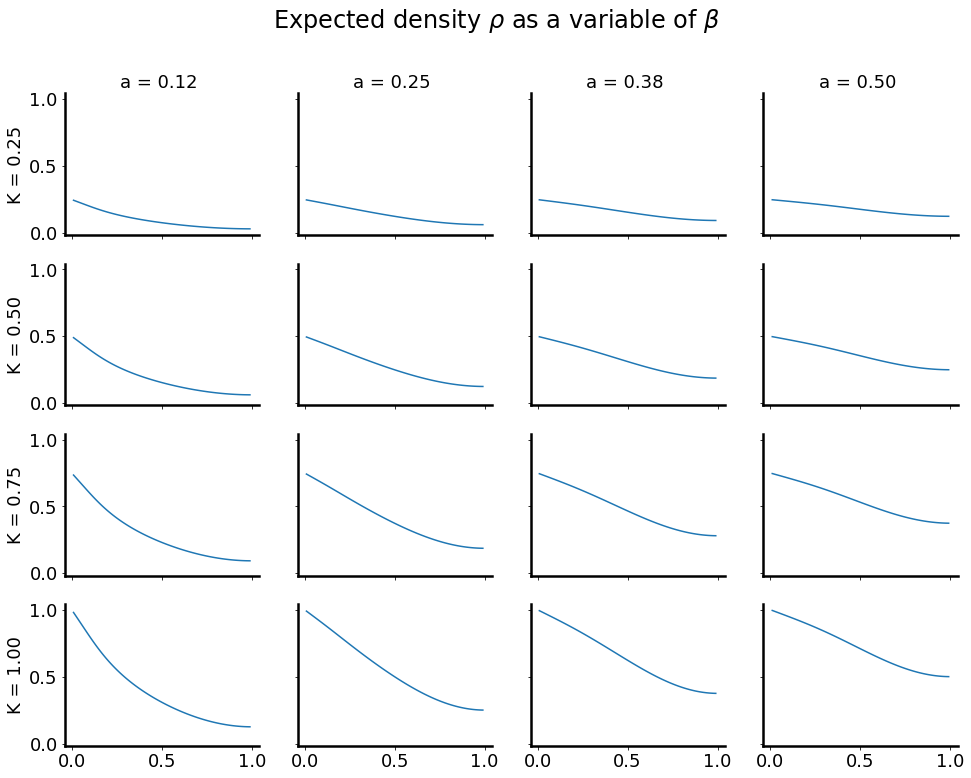

In [55]:
n_figures = 4

alphas = np.linspace(0.5/n_figures, 0.5, n_figures)
Ks = np.linspace(1/n_figures, 1, n_figures)

betas = np.linspace(0.01, 0.99, 99)
rates  = np.tan(np.pi * (1-betas) / 2)

fig, axes = plt.subplots(n_figures, n_figures, figsize = (16,12), sharex=True, sharey=True)

fig.suptitle(fr'Expected density $\rho$ as a variable of $\beta$', fontsize=24)
for i,j in product(range(n_figures), repeat = 2):
    ax = axes[i,j]
    if j == 0:
        ax.set_ylabel(f"K = {Ks[i]:.2f}", fontsize = 18)
    if j == 4:
        ax.set_ylabel(f"K = {Ks[i]:.2f}", fontsize = 18)
        ax.yaxis.set_label_position("right")
    if i == 0:
        ax.set_title(f"a = {alphas[j]:.2f} ", fontsize = 18)
    
    rhos = rng.classes.network_model.interaction_strength_to_density(K=Ks[i], a=alphas[j], rate=rates)
    ax.plot(betas, rhos)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    rng.ax_setup(ax)
    ax.tick_params(axis='both', which='major', labelsize=18)

In [56]:
def rho_to_K(rho, a, rate):
    try:
        return rng.classes.network_model.density_to_interaction_strength(rho=rho, a=a, rate=rate)
    except ValueError:
        return np.nan

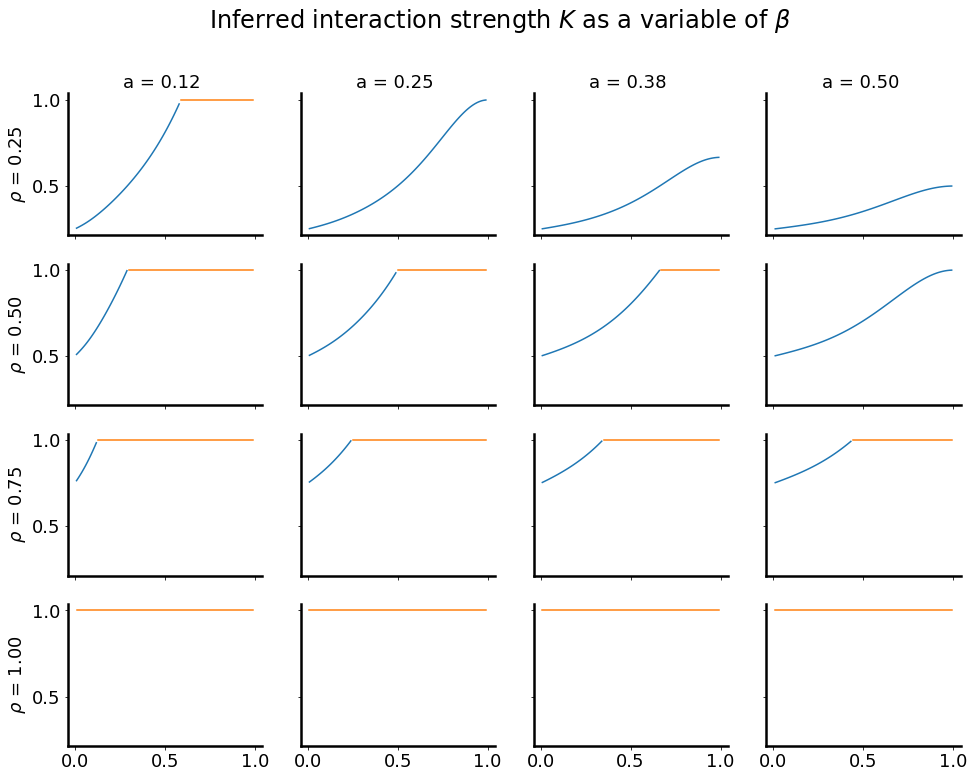

In [57]:
n_figures = 4

alphas = np.linspace(0.5/n_figures, 0.5, n_figures)
rhos = np.linspace(1/n_figures, 1, n_figures)

betas = np.linspace(0.01, 0.99, 99)
rates  = np.tan(np.pi * (1-betas) / 2)

fig, axes = plt.subplots(n_figures, n_figures, figsize = (16,12), sharex=True, sharey=True)

fig.suptitle(fr'Inferred interaction strength $K$ as a variable of $\beta$', fontsize=24)
for i,j in product(range(n_figures), repeat = 2):
    ax = axes[i,j]
    if j == 0:
        ax.set_ylabel(fr"$\rho$ = {rhos[i]:.2f}", fontsize = 18)
    if j == 4:
        ax.set_ylabel(fr"$\rho$ = {rhos[i]:.2f}", fontsize = 18)
        ax.yaxis.set_label_position("right")
    if i == 0:
        ax.set_title(f"a = {alphas[j]:.2f} ", fontsize = 18)
    
    Ks = [rho_to_K(rho=rhos[i], a=alphas[j], rate=rate) for rate in rates]
    ax.plot(betas, Ks)
    ax.plot(betas[np.isnan(Ks)], [1]*len(betas[np.isnan(Ks)]))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    rng.ax_setup(ax)
    ax.tick_params(axis='both', which='major', labelsize=18)

# Clustering coefficient

In [69]:
N = 2**8
n_figures = 4

In [70]:
alphas = np.linspace(0.5/n_figures, 0.5, n_figures)
betas = np.linspace(0.01, 0.99, n_figures)
Ks = np.linspace(1/n_figures, 1, n_figures)

rates  = np.tan(np.pi * (1-betas) / 2)

In [72]:
clustering = defaultdict(list)
network = dict()
positions = dict()

for i,j,k in product(range(n_figures), repeat = 3):
    G, pos = rng.network_model(N = N, K = Ks[i], a = alphas[j], rate = rates[k], return_positions = True)
    network[(i,j,k)] = G
    positions[(i,j,k)] = list(zip(np.cos(pos), np.sin(pos)))
    clustering[(i,j,k)].append(rng.clustering_coefficient(G))

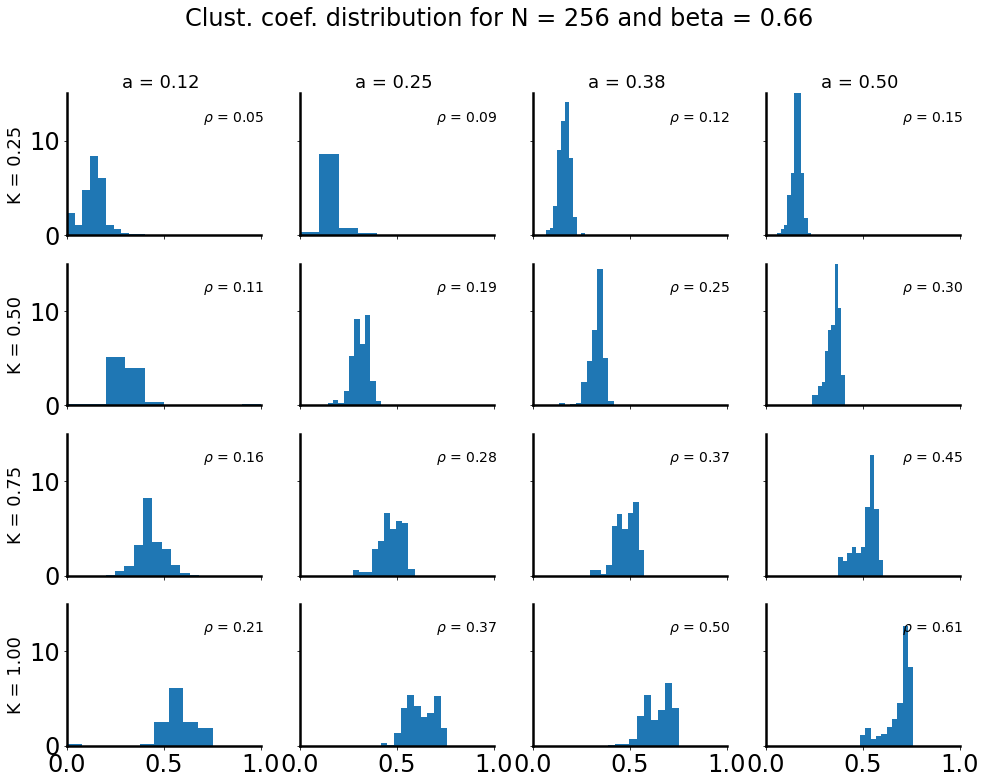

In [73]:
k = 2

fig, axes = plt.subplots(n_figures, n_figures, figsize = (16,12), sharex=True, sharey=True)

fig.suptitle(f'Clust. coef. distribution for N = {N} and beta = {betas[k]:.2f}', fontsize=24)
for i,j in product(range(n_figures), repeat = 2):
    ax = axes[i,j]
    if j == 0:
        ax.set_ylabel(f"K = {Ks[i]:.2f}", fontsize = 18)
    if j == n_figures:
        ax.set_ylabel(f"K = {Ks[i]:.2f}", fontsize = 18)
        ax.yaxis.set_label_position("right")
    if i == 0:
        ax.set_title(f"a = {alphas[j]:.2f} ", fontsize = 18)
    ax.hist(clustering[(i,j,k)], density = True, bins = 10)
    ax.text(x = 0.7, y = 12,
            s = fr"$\rho$ = {rng.interaction_strength_to_density(K=Ks[i], a=alphas[j], rate=rates[k]):.2f}",
            fontsize = 14)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim(0,15)
    ax.set_xlim(0,1)
    rng.ax_setup(ax)

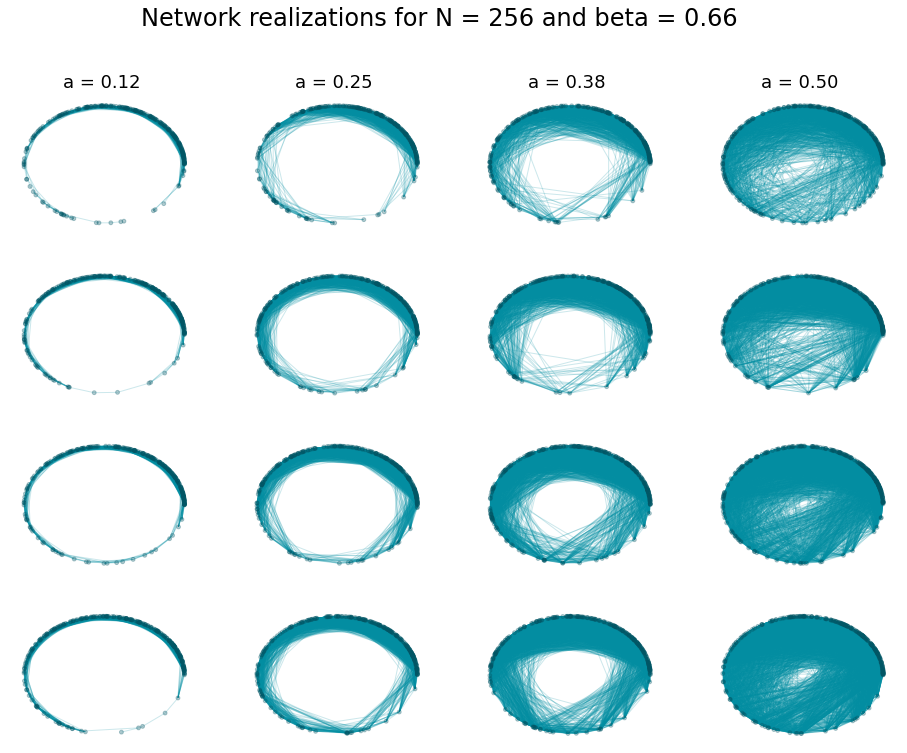

In [74]:
fig, axes = plt.subplots(n_figures, n_figures, figsize = (16,12), sharex=True, sharey=True)

fig.suptitle(f'Network realizations for N = {N} and beta = {betas[k]:.2f}', fontsize=24)
for i,j in product(range(n_figures), repeat = 2):
    ax = axes[i,j]
    rng.plot_nx(network[(i,j,k)], pos = positions[(i,j,k)], ax=ax)
    if j == 0:
        ax.set_ylabel(f"K = {Ks[i]:.2f}", fontsize = 18)
    if j == 4:
        ax.set_ylabel(f"K = {Ks[i]:.2f}", fontsize = 18)
        ax.yaxis.set_label_position("right")
    if i == 0:
        ax.set_title(f"a = {alphas[j]:.2f} ", fontsize = 18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    rng.ax_setup(ax)

In [94]:
N = 2**8
n_figures = 4

In [95]:
alphas = np.linspace(0.5/n_figures, 0.5, n_figures)
betas = np.linspace(0.01, 0.99, n_figures)
rhos = np.linspace(0, 0.5, n_figures, endpoint=False)

rates  = np.tan(np.pi * (1-betas) / 2)

In [96]:
clustering = dict()
network = dict()
positions = dict()

for i,j,k in product(range(n_figures), repeat = 3):
    rho_max = rng.classes.network_model.mean_similarity(rate = rates[k], a = alphas[j])
    if rhos[i] > rho_max:
        network[(i,j,k)] = np.nan
        positions[(i,j,k)] = np.nan
        clustering[(i,j,k)] = np.nan
        continue
    G, pos = rng.network_model(N = N, rho = rhos[i], a = alphas[j], rate = rates[k], return_positions = True)
    network[(i,j,k)] = G
    positions[(i,j,k)] = list(zip(np.cos(pos), np.sin(pos)))
    clustering[(i,j,k)] = rng.clustering_coefficient(G)

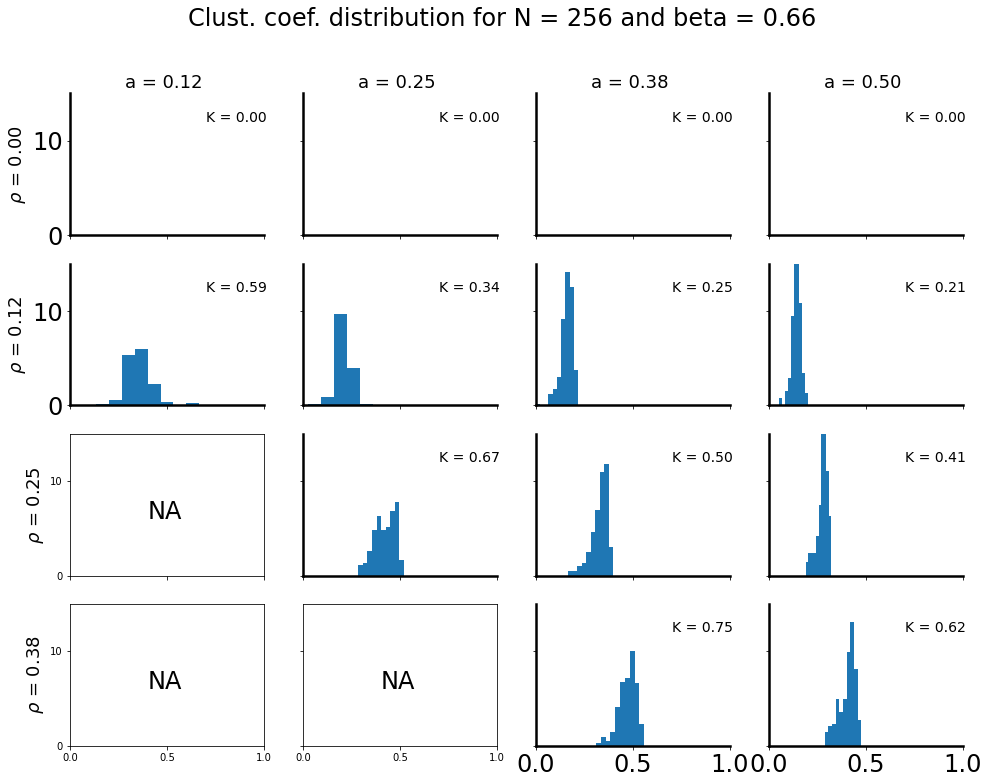

In [118]:
k = 2

fig, axes = plt.subplots(n_figures, n_figures, figsize = (16,12), sharex=True, sharey=True)

fig.suptitle(f'Clust. coef. distribution for N = {N} and beta = {betas[k]:.2f}', fontsize=24)
for i,j in product(range(n_figures), repeat = 2):
    ax = axes[i,j]
    if j == 0:
        ax.set_ylabel(fr"$\rho$ = {rhos[i]:.2f}", fontsize = 18)
    if j == n_figures:
        ax.set_ylabel(fr"$\rho$ = {rhos[i]:.2f}", fontsize = 18)
        ax.yaxis.set_label_position("right")
    if i == 0:
        ax.set_title(f"a = {alphas[j]:.2f} ", fontsize = 18)
    
    if network[(i,j,k)] is np.nan:
        ax.text(x = 0.4, y = 6,
            s = fr"NA",
            fontsize = 24)
        continue
        
    curr_clustering = clustering[(i,j,k)]
    curr_clustering = curr_clustering[~np.isnan(curr_clustering)]
    
    if len(curr_clustering) > 0:
        ax.hist(clustering[(i,j,k)], density = True, bins = 10)
    ax.text(x = 0.7, y = 12,
            s = fr"K = {rng.density_to_interaction_strength(rho=rhos[i], a=alphas[j], rate=rates[k]):.2f}",
            fontsize = 14)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim(0,15)
    ax.set_xlim(0,1)
    rng.ax_setup(ax)

In [ ]:
k = 2

fig, axes = plt.subplots(n_figures, n_figures, figsize = (16,12), sharex=True, sharey=True)

fig.suptitle(f'Clust. coef. distribution for N = {N} and beta = {betas[k]:.2f}', fontsize=24)
for i,j in product(range(n_figures), repeat = 2):
    ax = axes[i,j]
    if j == 0:
        ax.set_ylabel(fr"$\rho$ = {rhos[i]:.2f}", fontsize = 18)
    if j == n_figures:
        ax.set_ylabel(fr"$\rho$ = {rhos[i]:.2f}", fontsize = 18)
        ax.yaxis.set_label_position("right")
    if i == 0:
        ax.set_title(f"a = {alphas[j]:.2f} ", fontsize = 18)
    
    if network[(i,j,k)] is np.nan:
        ax.text(x = 0.4, y = 6,
            s = fr"NA",
            fontsize = 24)
        continue
        
    curr_clustering = clustering[(i,j,k)]
    curr_clustering = curr_clustering[~np.isnan(curr_clustering)]
    
    if len(curr_clustering) > 0:
        ax.hist(clustering[(i,j,k)], density = True, bins = 10)
    ax.text(x = 0.7, y = 12,
            s = fr"K = {rng.density_to_interaction_strength(rho=rhos[i], a=alphas[j], rate=rates[k]):.2f}",
            fontsize = 14)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim(0,15)
    ax.set_xlim(0,1)
    rng.ax_setup(ax)

---

# Theory expansion

## As a statistical interaction network model

Fixed parameters of the model are:
 - an _internal state spce / response space / local microstates_, $\sigma_{\mathit int} = \{ 0, 1\}$
 - an _external state space_, $\sigma_{\mathit ext} = [ 0, 2\pi]$
 - position distribution of elements / components / statistical units, $X_i \sim WExp(\lambda)$
 - a connection function, 
$p:\sigma_{\mathit ext} \times \sigma_{\mathit ext} \rightarrow [0,1]: (\theta_i, \theta_j) \mapsto \min \Big\{1, k - \frac{k}{2\pi a}d(\theta_i, \theta_j) \Big\}$,

where $d(.,.)$ is the "_periodic distance_", i.e. $d(\theta_i, \theta_j) = \min {\Big\{ \big|\theta_i-\theta_j\big|, 2\pi-\big|\theta_i-\theta_j\big|} \Big\}$

## As an Ising model with a "_random lattice_"

---
**Pending Thoughts**

I think the Ising model makes more sense for the "line graph", i.e. where the edges represent components and nodes define interactions.

---

Given the three parameters $N$, $a$ and $\beta$ we can construct a "_random lattice_" $\Lambda$ via:
$$\langle ij \rangle \Leftrightarrow d(\Theta_i, \Theta_j) < 2\pi a \, , \text{where } \Theta_k \sim \mathit WExp (\lambda)$$

## As a Generalized random geometric graph (RGG)

The connection fucntion is taken from the "_Quasi unit disk model_" via
$$H(d) =
    \begin{cases}
      1, & \text{if}\ d \leq d_- \\
      \frac{d_+ - d}{d_+ - d_-}, & \text{if}\ d_- \leq d \leq d_+ \\
      0, & \text{if}\ d \geq d_+
    \end{cases} \, ,$$ 
    
where $d_- = 2\pi a (1-1/k)$ and $d_+ = 2$. 

The small $d$ expansion is the constant $1$ (similar to a random geometric graph model with a "hard" cutoff).

## References
- Dettmann, Carl P., and Orestis Georgiou. "Random geometric graphs with general connection functions." Physical Review E 93.3 (2016): 032313.
- Kuhn, F., R. Wattenhofer, and A. Zollinger. "Proceedings of the 2003 Joint Workshop on Foundations of Mobile Computing." (2003): 69-78.
- Gao, Deyun, et al. "Hop-distance relationship analysis with quasi-UDG model for node localization in wireless sensor networks." EURASIP Journal on Wireless Communications and Networking 2011.1 (2011): 1-11

In [59]:
rng.interaction_strength_to_density(K=0.1, a=0.15, rate = 0.0157)

0.015008786552784937

In [49]:
rng.classes.network_model.get_rate_parameter(beta = 0.99, rate = None)

0.01570925532366493